# Comparison between the performance of Naive Bayes and Logistic Regression

For the comparison of the predictions made for the classification by the two models namely Naive Bayes and Logistic Regression, I will start the comparison by initially reading the dataset, analyzing it and performing some preprocessing if required. Thereafter, the processed dataset will then be splitted into training and testing dataset upon which the two models will be separately trained and tested. The performance will then be analyzed by comparison with respect to their accuracy, recall, precision, f1-score, plotting confusion matrix and finding patterns to suggest which model performed well. In order to reach the objective, I will be conducting the following operations:
* **Data Exploration**: The first step includes loading the dataset and analyzing for if it requires any preprocessing like balancing, normalization, etc. Analyses is done better when the data is visualised to find patterns in the dataset and understand the distribution. Once the dataset is processed, it needs to be splitted into training and testing dataset.
* **Naive Bayes Model**: In this step, I will build a Naive Bayes model that will be trained and tested, thereafter evaluated.
* **Logistic Regression Model**: In this step, I will build a Logistic Regression model that will be trained and tested, thereafter evaluated.
* **Performance Comparison**: Once both the models are trained and tested, they will be compared based upon their confusion matrices and classification reports and plots will be used to evaluate the differences.
* **Conclusion**: Finally, a conclusion will be drawn from the comparison being made.

## Data Exploration

The dataset consists of features describing the properties of proteins found in Escherichia coli, and the location of the proteins within the cell, that is the class provided in the dataset or we can call it as our target variable. The features include X1 to X5, and the target variable is denoted by 'C'.

Let's start by loading the dataset and exploring its structure.

#### A. Importing Libraries and loading the Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
dataset = pd.read_csv('ecoli.csv')

# Displaying the first few rows of the dataset
dataset.head()

,X1,X2,X3,X4,X5,C
0,-0.007564,0.222171,0.158978,1.159728,0.267387,0
1,0.171858,-0.041690,0.250635,0.165851,0.461043,0
2,0.736046,0.343963,0.749114,0.561858,0.712554,0
3,0.000639,-0.175082,0.070584,0.317284,0.582597,0
4,0.571760,-0.244216,0.234515,0.902095,0.594026,0


#### B. Visualising the dataset

The visualisation of features will help in understanding the distribution along the range of values available.

<Axes: xlabel='X5', ylabel='Count'>

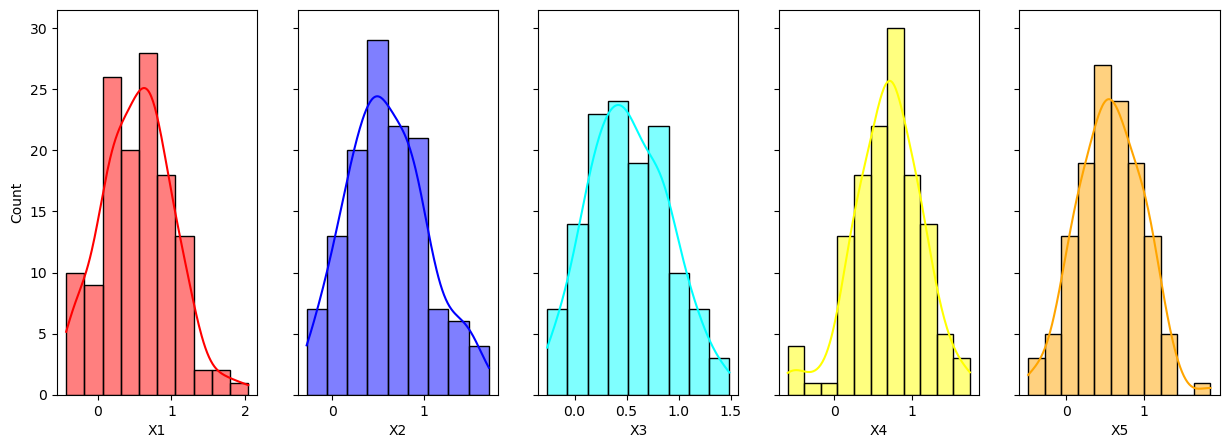

In [2]:
# Visualising the features of the dataset
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

# Plotting the features X1, X2, X3, X4, X5
sns.histplot(dataset, ax=axes[0], x="X1", kde=True, stat='count', bins='auto', color='red')
sns.histplot(dataset, ax=axes[1], x="X2", kde=True, stat='count', bins='auto', color='blue')
sns.histplot(dataset, ax=axes[2], x="X3", kde=True, stat='count', bins='auto', color='cyan')
sns.histplot(dataset, ax=axes[3], x="X4", kde=True, stat='count', bins='auto', color='yellow')
sns.histplot(dataset, ax=axes[4], x="X5", kde=True, stat='count', bins='auto', color='orange')

> The features of the dataset has values in a slightly different ranges. It will be ideal to normalise them to the same range so that the model performs well. Though the distribution pattern seems similar but the ranges are different.

#### C. Normalising the dataset

I am applying Z-score Normalisation to the features of this dataset to allow the features to follow through the same range of values without disturbing the pattern. The new normalised features will have maximum values ranging between (-1,1).

<Axes: xlabel='X5', ylabel='Count'>

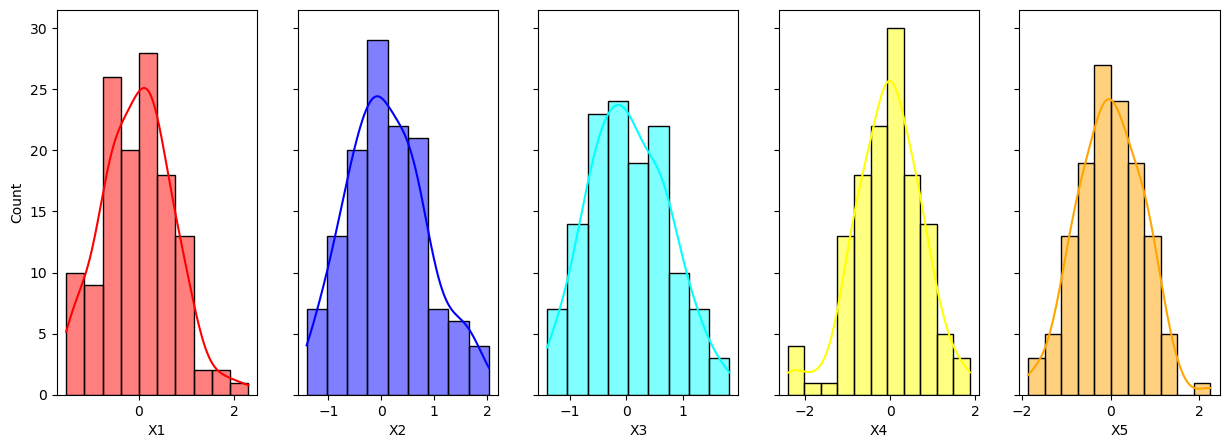

In [3]:
# Selecting the columns with features (X1, X2, X3, X4, X5)
features = dataset[['X1', 'X2', 'X3', 'X4', 'X5']]

# Initialize the StandardScaler
scaler = RobustScaler()

# Fitting and transforming the features using Z-score normalisation
z_normalised_features = scaler.fit_transform(features)

# Replacing the original features with the normalized ones
dataset[['X1', 'X2', 'X3', 'X4', 'X5']] = z_normalised_features

# Visualising the features after Z-score normalisation
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

# Plotting the normalised features X1, X2, X3, X4, X5
sns.histplot(dataset, ax=axes[0], x="X1", kde=True, stat='count', bins='auto', color='red')
sns.histplot(dataset, ax=axes[1], x="X2", kde=True, stat='count', bins='auto', color='blue')
sns.histplot(dataset, ax=axes[2], x="X3", kde=True, stat='count', bins='auto', color='cyan')
sns.histplot(dataset, ax=axes[3], x="X4", kde=True, stat='count', bins='auto', color='yellow')
sns.histplot(dataset, ax=axes[4], x="X5", kde=True, stat='count', bins='auto', color='orange')

> Now it can be observed that the features are following the same range without much difference in the distribution that was followed previously. Also it can be observed that the features follow a normal distribution. These observations will help in selecting the most suitable Naive Bayes model.

#### D. Split the data

While splitting the dataset into training and testing dataset, I kept the random_state to 50 and stratified the target variable so as to preserve the original distribution after splitting as well. The original distribution has imbalanced classes and thus the same pattern will be carried forward to the train-test splitted data. Also, the training is done on 75% of the data and testing is done on 25% of the data.

In [4]:
# Splitting the data into features (X) and target variable (y)
X = z_normalised_features
y = dataset['C']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50, shuffle=True, stratify=y)

## Naive Bayes Model

#### A. Model Explanation

Naive Bayes is a probabilistic algorithm based on Bayes theorem, with the condition that the features are independent amongst themselves. This implies that it performs classification for a dataset where if any value is changed within the dataset, it does not affect the other values. The model uses the features X1 to X5 to predict the protein class, either 0 or 1.

The probability of a class given the features can be expressed as:
<br><br>
<center>$ P(C | X) \propto P(C) \prod_{i=1}^{n} P(X_i | C) $</center>

#### B. Finding the most suitable model

Naive Bayes is a family of probabilistic classification algorithms based on Bayes' theorem. Looking at the datset that has features in the scales of (-1,1), a normal distribution is observed. Out of this family of Naive Bayes, I am selecting Gaussian Naive Bayes as it works well for normal distibution. I wanted to use cross-validation to find the best classifier but Gaussian Naive Bayes does not have hyperparameters wich implies that there is no such requirement to perfrom cross-validation.<br> 
The main types of Naive Bayes classifiers include:

* **Gaussian Naive Bayes**: Gaussian Naive Bayes assumes that the features follow a Gaussian (normal) distribution. It is suitable for continuous or real-valued features.<br>
<center>$P(C | X) \propto P(C) \prod_{i=1}^{n} P(X_i | C)$</center>
<br>
* **Multinomial Naive Bayes**: Multinomial Naive Bayes assumes that the features are multinomially distributed. This is commonly used for text classification tasks where features represent word counts or term frequencies. It is suitable for discrete data, especially in text classification.<br><br>
<center>$P(C | X) \propto P(C) \prod_{i=1}^{n} \frac{{(\text{{count of }} X_i \text{{ in }} X \text{{ for class }} C) + \alpha}}{{(\text{{total count of features in }} X \text{{ for class }} C) + \alpha \cdot \text{{number of distinct features}}}}$</center>
<br>
* **Bernoulli Naive Bayes**: Bernoulli Naive Bayes assumes that features are binary (taking values of 0 or 1). It models the presence or absence of features. It is suitable for binary feature data, often used in document classification tasks where each feature represents the presence or absence of a term.<br><br>
<center>$P(C | X) \propto P(C) \prod_{i=1}^{n} P(X_i | C) + (1 - P(X_i | C))^{(1 - X_i)}$</center>

#### C. Model Training
After creating a Gaussian Naive Bayes model, I am training the model using the 75% data available in X_trian and y_train

In [5]:
# Creating the model
naive_bayes_model = GaussianNB()

# Training the model with X_tain and y_train
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

#### D. Model Evaluation
After the model is trained, I am testing it with the remaining 25% data in X_test and then compairing the predicted values with the actual values present in y_test. This evaluation will later be compared with the Logistic Regression model.

In [6]:
# Evaluating the Naïve Bayes model for comparison
naive_bayes_predictions = naive_bayes_model.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
naive_bayes_precision = precision_score(y_test, naive_bayes_predictions, average='weighted')
naive_bayes_recall = recall_score(y_test, naive_bayes_predictions, average='weighted')
naive_bayes_f1 = f1_score(y_test, naive_bayes_predictions, average='weighted')
naive_bayes_classification_report = classification_report(y_test, naive_bayes_predictions)

# Printing the accuracy, precision, recall and f1-score for the Gaussian Naive Bayes
print("Naive Bayes Accuracy: {:.2f}%".format(naive_bayes_accuracy * 100))
print("Naive Bayes Precision: {:.2f}%".format(naive_bayes_precision * 100))
print("Naive Bayes Recall: {:.2f}%".format(naive_bayes_recall * 100))
print("Naive Bayes F1-Score: {:.2f}%".format(naive_bayes_f1 * 100))

Naive Bayes Accuracy: 72.73%
Naive Bayes Precision: 73.18%
Naive Bayes Recall: 72.73%
Naive Bayes F1-Score: 71.00%


#### E. k-fold cross validation for Naive Bayes
K-Fold Cross Validation is a technique where we split our dataset into 'k' equal parts. During each round, one part is used for testing, and the remaining parts are used for training our model. This process repeats 'k' times, ensuring that each part gets a chance to be the test set. After evaluating the k-fold cross validation, I will compare the average of the cross validations performed for k=5, and then I will compare it with the actual model I built.

Naive Bayes Model Accuracy: 72.73%
Naive Bayes Cross-Validation Mean Accuracy: 71.23%


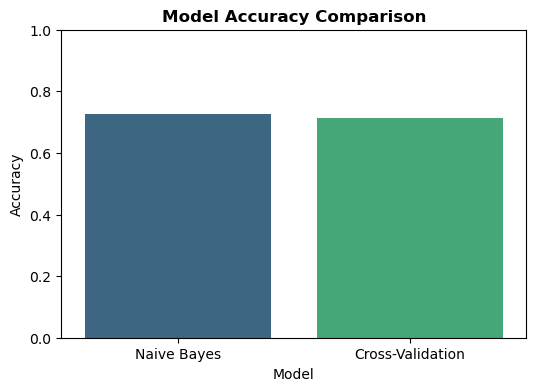

In [7]:
# Evaluate Naive Bayes model with k-fold cross-validation
naive_bayes_cv_scores = cross_val_score(naive_bayes_model, X, y, cv=5)

# Compare performance
print("Naive Bayes Model Accuracy: {:.2f}%".format(naive_bayes_accuracy * 100))
print("Naive Bayes Cross-Validation Mean Accuracy: {:.2f}%".format(naive_bayes_cv_scores.mean() * 100))

# Visualising the k-fold cross validation comparison
nb_cv_accuracy = pd.DataFrame({'Model': ['Naive Bayes' ,'Cross-Validation'],
                        'Accuracy': [naive_bayes_accuracy, naive_bayes_cv_scores.mean()]})

plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Accuracy', data=nb_cv_accuracy, palette='viridis')
plt.title('Model Accuracy Comparison', fontweight='bold')
plt.ylim(0, 1)
plt.show()

> It can be derived from the above comparison that the Naive Bayes model chosen is performing better than the mean of all the cross-validations performed for k=5.

## Logistic Regression Model

#### A. Model Explanation
Logistic Regression models the probability that the dependent variable belongs to a particular category using the logistic function. The model utilizes features X1 to X5 to predict the probability of protein class, either 0 or 1.

The logistic regression model predicts the log-odds of the probability:
<br><br>
<center>$ \text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n $</center>

#### B. Finding the most suitable model

Logistic Regression is a widely-used classification algorithm with key hyperparameters, namely $C$ and solver, significantly influencing model performance. Cross-validation, previously was not applicable for GaussainNB due to the lack of hyperparameters but here I am using it to find the more suitable values that could increase the perfromance of my model.

**Regularization Strength** ($C$): $C$ controls regularization in Logistic Regression. Tuning $C$ balances model simplicity and fitting, preventing overfitting or underfitting. Optimal C ensures effective generalization to new data. 
 * Small $C$ implies strong regularization for a simpler model.
 * Large $C$ reduces regularization, fitting the training data more closely.

**Optimization Algorithm** ($solver$): $solver$ selects the optimization algorithm for model fitting. Choosing the right $solver$ is critical for efficient model convergence. $solver$ performance varies based on dataset size, characteristics, and regularization type. Common $solver$ Options are:
 * *'liblinear'*: For small datasets, supports L1 and L2 regularization.
 * *'lbfgs'*, *'newton-cg'*: Suitable for large datasets and smooth, convex problems.
 * *'sag'*, *'saga'*: Stochastic Average Gradient, beneficial for large datasets and scalability.

**Maximum Number of Iterations** (***max_iter***): ***max_iter*** defines the maximum number of iterations for the solver to converge. It is an important hyperparameter to consider, especially when dealing with large or complex datasets. If the solver fails to converge within the specified number of iterations, it may impact model performance.

In [8]:
# Defining a hyperparameter grid
grid_hyperparam = {           
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   # Regularization strength
    'solver': ['liblinear', 'lbfgs'],      # Optimization algorithm
    'max_iter': [50, 100, 200, 300],       # Maximum number of iterations
}

# Creating a Logistic Regression model
logistic_regression_model_test = LogisticRegression()

# Performing a search using the grid of selected hyperparameters for cross-validation to extract the best suitable model
search = GridSearchCV(logistic_regression_model_test, grid_hyperparam, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

# Getting the best model
logistic_regression_best_model = search.best_estimator_

# Displaying the best hyperparameters
print(f"Best Hyperparameters are: {search.best_params_}")
print(f"The most suitable model is: {logistic_regression_best_model}")

# Evaluating the best model on the test set
best_logistic_regression_predictions = logistic_regression_best_model.predict(X_test)
accuracy = accuracy_score(y_test, best_logistic_regression_predictions)
print(f"Accuracy of this model on Test Set is: {accuracy:.2%}")

Best Hyperparameters are: {'C': 1, 'max_iter': 50, 'solver': 'liblinear'}
The most suitable model is: LogisticRegression(C=1, max_iter=50, solver='liblinear')
Accuracy of this model on Test Set is: 75.76%


#### C. Model Training
After the hyperparameters are extracted for the best performance, I am creating a Logistic Regression model, which will then be trained on the 75% data available in X_train and y_train.

In [9]:
# Creating a model as per the above hyperparameters
logistic_regression_model = LogisticRegression(C=0.001, solver='liblinear', max_iter=50)

# Training the model with X_tain and y_train 
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=50, solver='liblinear')

#### D. Model Evaluation
After the Logistic Regression model is trained, I am testing it with the 25% data present in X_test and evaluating the model by comparing the predicted values with the actual values present in y_test. A report is generated based upon the performance which will allow me to make the comparison between Logistic Regression and Gaussian Naive Bayes.

In [10]:
# Evaluate Logistic Regression model
logistic_regression_predictions = logistic_regression_best_model.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions, average='weighted')
logistic_regression_recall = recall_score(y_test, logistic_regression_predictions, average='weighted')
logistic_regression_f1 = f1_score(y_test, logistic_regression_predictions, average='weighted')
logistic_regression_classification_report = classification_report(y_test, logistic_regression_predictions)

# Printing the accuracy, precision, recall and f1-score for the Logistic Regression
print("Logistic Regression Accuracy: {:.2f}%".format(logistic_regression_accuracy * 100))
print("Logistic Regression Precision: {:.2f}%".format(logistic_regression_precision * 100))
print("Logistic Regression Recall: {:.2f}%".format(logistic_regression_recall * 100))
print("Logistic Regression F1-Score: {:.2f}%".format(logistic_regression_f1 * 100))

Logistic Regression Accuracy: 75.76%
Logistic Regression Precision: 75.48%
Logistic Regression Recall: 75.76%
Logistic Regression F1-Score: 75.32%


#### E. k-fold cross-validation of Logistic Regression
Similar to the Naive Bayes, I will perform a k-fold validation for Logistic Regression and then a comparison will be made between the average of the accuracies of the models cross-validated with the model I built. In this case also k=5.

Logistic Regression Model Accuracy: 75.76%
Logistic Regression Cross-Validation Mean Accuracy: 71.23%


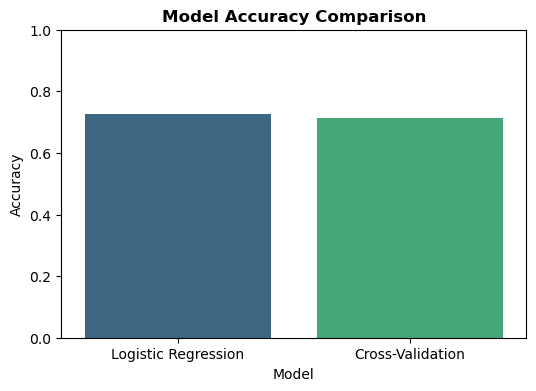

In [11]:
# Evaluate Logistic Regression model with k-fold cross-validation
logistic_regression_cv_scores = cross_val_score(logistic_regression_model, X, y, cv=5)

# Compare performance
print("Logistic Regression Model Accuracy: {:.2f}%".format(logistic_regression_accuracy * 100))
print("Logistic Regression Cross-Validation Mean Accuracy: {:.2f}%".format(logistic_regression_cv_scores.mean() * 100))

# Visualising the k-fold cross validation comparison
lr_cv_accuracy = pd.DataFrame({'Model': ['Logistic Regression' ,'Cross-Validation'],
                        'Accuracy': [naive_bayes_accuracy, naive_bayes_cv_scores.mean()]})

plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Accuracy', data=lr_cv_accuracy, palette='viridis')
plt.title('Model Accuracy Comparison', fontweight='bold')
plt.ylim(0, 1)
plt.show()

> It can be derived from the above comparison that the Logistic Regression model chosen is performing way better than the mean of all the cross-validations performed for k=5.

## Performance Comparison
Now that both the models are trained and tested with accuracy and classification reports generated, I will compare the performance of both the models in terms of accuracy, precision, recall, F1-score and Confusion matrix. Finally, I am plotting a comparison graph between precision and recall, thus calculating the Area Under the Curve followed by a plot for the comparision of the two models based upon the actual and predicted values.

#### A. Compairing Accuracy, Precison, Recall and F1-Score

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes Model Accuracy: 72.73%
Logistic Regression Model Accuracy: 75.76%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes Model Precision: 73.18%
Logistic Regression Model Precision: 75.48%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes Model Recall: 72.73%
Logistic Regression Model Recall: 75.76%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes Model F1-Score: 71.00%
Logistic Regression Model F1-Score: 75.32%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


<Axes: xlabel='Model', ylabel='F1-Score'>

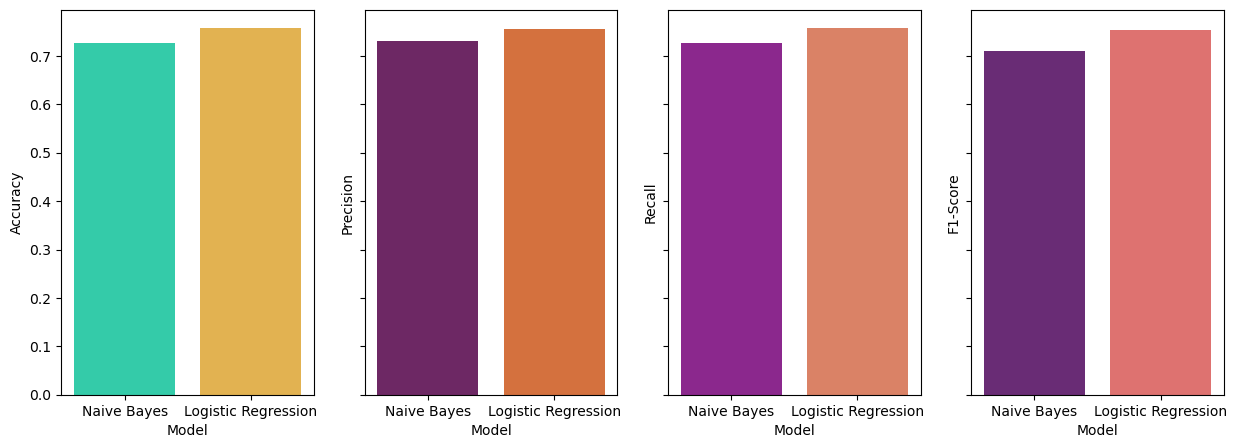

In [12]:
# Comparing the performance based on Accuracy, Precision, Recall, F1-score
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Naive Bayes Model Accuracy: {:.2f}%".format(naive_bayes_accuracy * 100))
print("Logistic Regression Model Accuracy: {:.2f}%".format(logistic_regression_accuracy * 100))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Naive Bayes Model Precision: {:.2f}%".format(naive_bayes_precision * 100))
print("Logistic Regression Model Precision: {:.2f}%".format(logistic_regression_precision * 100))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Naive Bayes Model Recall: {:.2f}%".format(naive_bayes_recall * 100))
print("Logistic Regression Model Recall: {:.2f}%".format(logistic_regression_recall * 100))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Naive Bayes Model F1-Score: {:.2f}%".format(naive_bayes_f1 * 100))
print("Logistic Regression Model F1-Score: {:.2f}%".format(logistic_regression_f1 * 100))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Visualising the comparison drawn between Naive Bayes and Logistic Regression
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

accuracies = pd.DataFrame({'Model': ['Naive Bayes' ,'Logistic Regression'],
                        'Accuracy': [naive_bayes_accuracy, logistic_regression_accuracy]})
precisions = pd.DataFrame({'Model': ['Naive Bayes' ,'Logistic Regression'],
                        'Precision': [naive_bayes_precision, logistic_regression_precision]})
recalls = pd.DataFrame({'Model': ['Naive Bayes' ,'Logistic Regression'],
                        'Recall': [naive_bayes_recall, logistic_regression_recall]})
f1s = pd.DataFrame({'Model': ['Naive Bayes' ,'Logistic Regression'],
                        'F1-Score': [naive_bayes_f1, logistic_regression_f1]})

# Plotting the Bar plots for Accuracy, Precision, Recall and F1-score
sns.barplot(x='Model', y='Accuracy', data=accuracies, palette='turbo', ax=axes[0])
sns.barplot(x='Model', y='Precision', data=precisions, palette='inferno', ax=axes[1])
sns.barplot(x='Model', y='Recall', data=recalls, palette='plasma', ax=axes[2])
sns.barplot(x='Model', y='F1-Score', data=f1s, palette='magma', ax=axes[3])

>This can be observed that the accuracy of the Logistic Regression model is slightly more than that of the accuracy of Naive Bayes model. But with a limited number of records and the selected parameters and hyperparameters, the accuracy of this range suggests that the model is neither undergoing overfitting, now underfitting. Also, Logistic Regression has a comparatively higher precision, recall and f1-score.


#### B. Compairing Classification Reports

In [13]:
# Displaying the classification report for both the models
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\nNaive Bayes Classification Report:\n", naive_bayes_classification_report)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\nLogistic Regression Classification Report:\n", logistic_regression_classification_report)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        20
           1       0.75      0.46      0.57        13

    accuracy                           0.73        33
   macro avg       0.73      0.68      0.69        33
weighted avg       0.73      0.73      0.71        33

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.73      0.62      0.67        13

    accuracy                           0.76        33
   macro avg       0.75      0.73      0.74        33
weighted avg       0.75      0.76      0.75        33

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


> In the Naive Bayes classification report, the model has an accuracy of 73%. The precision for class 0 is 72% and for class 1 is 75%. The recall for class 0 is 90% and for class 1 is 46%. The f1-score for class 0 is 80% and for class 1 is 57%.

> In the Logistic Regression classification report, the model has an accuracy of 76%. The precision for class 0 is 77% and for class 1 is 73%. The recall for class 0 is 85% and for class 1 is 62%. The f1-score for class 0 is 81% and for class 1 is 67%.

> Based on the classification reports, we can see that the Logistic Regression model has a slightly higher accuracy, precision, recall, and f1-score than the Naive Bayes model.

#### C. Plotting the Confusion Matrices

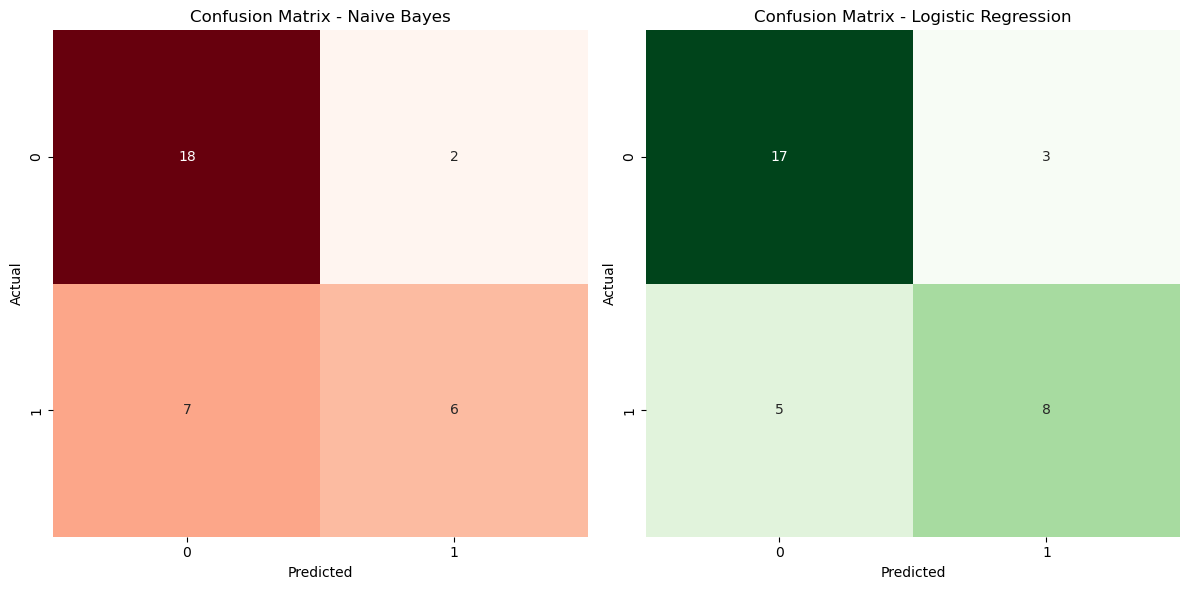

In [14]:
# Plotting the Confusion Matrix for Naive Bayes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, naive_bayes_predictions), annot=True, fmt="d", cmap='Reds', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotting the Confusion Matrix for Logistic Regression
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, logistic_regression_predictions), annot=True, fmt="d", cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

>In the above confusion matrices, it can be found that the prediction is done over 33 test samples.<br>
(18 + 2 + 7 + 6 = 33) or (17 + 3 + 5 + 8 = 33)

>For the Gaussian Naive Bayes, the model correctly predicted 18 samples as true positives and 6 samples as true negatives. The model incorrectly predicted 2 samples as false negatives and 7 samples as false positives.

>Whereas, for Logistic Regression, the model correctly predicted 17 samples as true positives and 8 samples as true negatives. The model incorrectly predicted 3 samples as false negatives and 5 samples as false positives.

>Now, based upon the values of True Positive(TP), False Positive(FP), True Negative(TN) and False Negative(FN), we can derive the values of Accuracy, Precision, Recall(Senstivity) and F1-score as follows:

<center>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</center><br>

<center>$Precision = \frac{TP}{TP+FP}$</center><br>

<center>$Recall = \frac{TP}{TP+FN}$</center><br>

<center>$F1-score = 2 * \frac{Precision * Recall}{Precision + Recall} = \frac{2TP}{2TP+FP+FN}$</center>
<br><br>

#### D. Plotting the Precision-Recall Curve

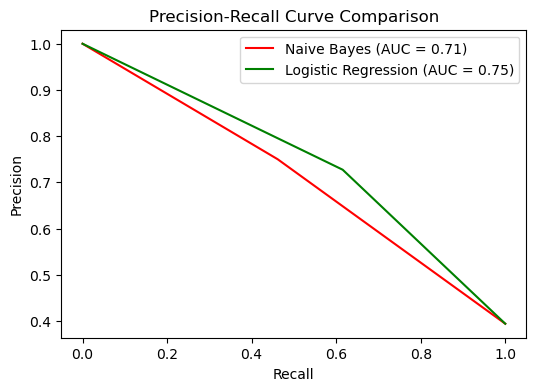

In [15]:
# Calculating precision and recall for Naive Bayes
precision_nb, recall_nb, _ = precision_recall_curve(y_test, naive_bayes_predictions)
auc_nb = auc(recall_nb, precision_nb)

# Calculating precision and recall for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, logistic_regression_predictions)
auc_lr = auc(recall_lr, precision_lr)

# Plotting Precision-Recall curves
plt.figure(figsize=(6, 4))
plt.plot(recall_nb, precision_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', color='red')
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()

>The precision-recall curve analysis suggests that both Naive Bayes and Logistic Regression models exhibit reasonably good performance. The area under the curve (AUC) for Logistic Regression (0.75) indicates slightly higher precision-recall trade-off compared to Naive Bayes (0.71). This suggests that the Logistic Regression model achieves a better balance between precision and recall, making it relatively more effective in handling the classification task.

#### E. Plotting the graph to compare the Actual Vs Predicted Values

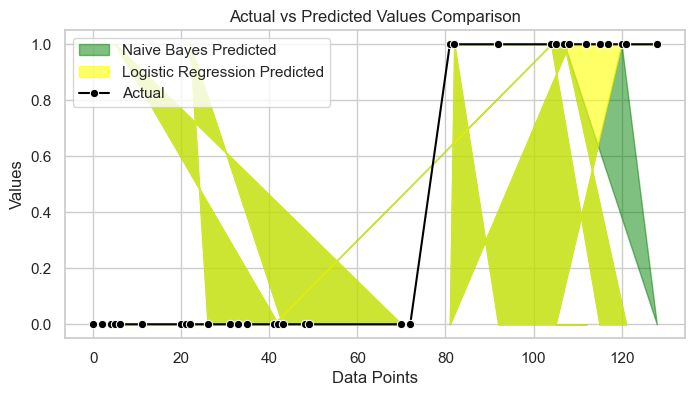

In [16]:
# Getting predicted values for both models
nb_predictions = naive_bayes_model.predict(X_test)
lr_predictions = logistic_regression_model.predict(X_test)

# Creating DataFrames for visualization
df_vis_nb = pd.DataFrame({'Actual': y_test, 'Predicted': nb_predictions})
df_vis_lr = pd.DataFrame({'Actual': y_test, 'Predicted': lr_predictions})

# Sortting DataFrames by Actual values for a smoother line plot
df_vis_nb = df_vis_nb.sort_values(by='Actual')
df_vis_lr = df_vis_lr.sort_values(by='Actual')

# Setting a Seaborn style
sns.set(style="whitegrid")

# Creating a filled area plot for Naive Bayes
plt.figure(figsize=(8, 4))
plt.fill_between(df_vis_nb.index, df_vis_nb['Actual'], df_vis_nb['Predicted'], color='green', alpha=0.5, label='Naive Bayes Predicted')

# Creating a filled area plot for Logistic Regression
plt.fill_between(df_vis_lr.index, df_vis_lr['Actual'], df_vis_lr['Predicted'], color='yellow', alpha=0.6, label='Logistic Regression Predicted')

# Creating a smoother line plot for Actual values
sns.lineplot(x=df_vis_nb.index, y=df_vis_nb['Actual'], label='Actual', marker='o', color='black', alpha=1)

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values Comparison')
plt.legend()
plt.show()

> This is a comparison made between the predicted values for Naive Bayes and Logistic Regression with the actual values that we have in y_test. With this plot, it can be illustrated that Logistic Regression does well as it predicts less False Negative values as compared to Naive Bayes and more True Positive values. Also, the number of Flase Positives predicted by Naive Bayes are more as compared to Logistic Regression that suggests the improvement of the Naive Bayes model over predicting the False Positive values.

## Conclusion

A final conclusion can be drawn from the comparison that Logistic Regression performs well as compared to Naive Bayes with a small datatset without overfitting much and without being biased. Though, the dataset is not completely balanced but still with the selected Naive Bayes model based upon the distribution and the tuned hyperparameters for Logistic Regression, the models did not show biased behaviour within the two classes. Gaussian Naive Bayes performed well but Logistic Regression performed even better as the accuracy was better for Logistic Regression. Whereas, in terms of other performance indices like precision, recall(senstivity) and f1-score, Logistic Regression proved to be a better model for classification as compared to Naive Bayes.